In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('Sales_data_zone_wise.csv')

In [3]:
df.head()

,Month,Zone - A,Zone - B,Zone - C,Zone - D
0,Month - 1,1483525,1748451,1523308,2267260
1,Month - 2,1238428,1707421,2212113,1994341
2,Month - 3,1860771,2091194,1282374,1241600
3,Month - 4,1871571,1759617,2290580,2252681
4,Month - 5,1244922,1606010,1818334,1326062


In [4]:
df.shape

(29, 5)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Month     29 non-null     object
 1   Zone - A  29 non-null     int64 
 2   Zone - B  29 non-null     int64 
 3   Zone - C  29 non-null     int64 
 4   Zone - D  29 non-null     int64 
dtypes: int64(4), object(1)
memory usage: 1.3+ KB


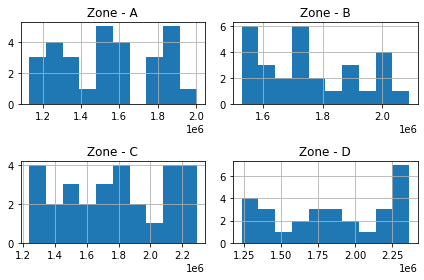

In [6]:
df.hist()
plt.tight_layout()

# The mean sales generated by each zone.

In [7]:
df.describe()

,Zone - A,Zone - B,Zone - C,Zone - D
count,2.900000e+01,2.900000e+01,2.900000e+01,2.900000e+01
mean,1.540493e+06,1.755560e+06,1.772871e+06,1.842927e+06
std,2.619401e+05,1.683899e+05,3.331937e+05,3.750165e+05
min,1.128185e+06,1.527574e+06,1.237722e+06,1.234311e+06
25%,1.305972e+06,1.606010e+06,1.523308e+06,1.520406e+06
50%,1.534390e+06,1.740365e+06,1.767047e+06,1.854412e+06
75%,1.820196e+06,1.875658e+06,2.098463e+06,2.180416e+06
max,2.004480e+06,2.091194e+06,2.290580e+06,2.364132e+06


In [8]:
a=df.columns.tolist()
z_list=a[1:]
for each in z_list:
    print(each,"- Mean Sales is :",df[each].mean())

Zone - A - Mean Sales is : 1540493.1379310344
Zone - B - Mean Sales is : 1755559.5862068965
Zone - C - Mean Sales is : 1772871.0344827587
Zone - D - Mean Sales is : 1842926.7586206896


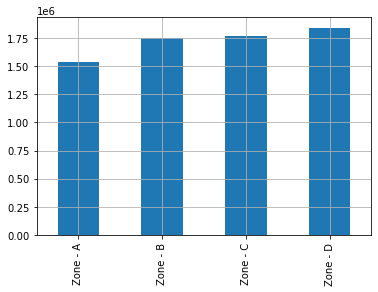

In [9]:
df.mean(numeric_only=True).plot.bar(grid=True);

# Total sales generated by all the zones for each month

In [30]:
df['Total Sales']=df['Zone - A']+df['Zone - B']+df['Zone - C']+df['Zone - D']
df.head()

,Month,Zone - A,Zone - B,Zone - C,Zone - D,Total Sales
0,Month - 1,1483525,1748451,1523308,2267260,7022544
1,Month - 2,1238428,1707421,2212113,1994341,7152303
2,Month - 3,1860771,2091194,1282374,1241600,6475939
3,Month - 4,1871571,1759617,2290580,2252681,8174449
4,Month - 5,1244922,1606010,1818334,1326062,5995328


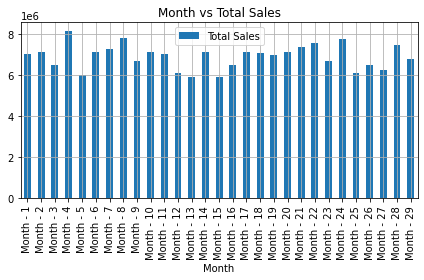

In [13]:
df[['Month','Total Sales']].plot.bar(x='Month',y='Total Sales',title="Month vs Total Sales",grid=True)
plt.tight_layout()

# Check whether all the zones generate the same amount of sales.


In [14]:
#Setting 
#Ho:All zones generates the same amount
#a:Diffrent amount is generated by diffrent zones

In [15]:
alpha=0.05

In [16]:
from scipy.stats import f_oneway
_,p=f_oneway(df['Zone - A'],df['Zone - B'],df['Zone - C'],df['Zone - D'])
p

0.0011827601694503335

In [17]:
if p<alpha:
    print("Rejecting Null Hypothesis ")
else:
    print("Failing to Reject null Hypothesis")

Rejecting Null Hypothesis 


#### From the above result we can conclude that diffrent amount of sales is generated by each zone